In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection

# thư viện báo các kq phân lớp
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#tính độ chính xác phân lớp 
from sklearn.metrics import accuracy_score
# xây dựng cây quyết định
from sklearn.tree import DecisionTreeClassifier
#thư viện tạo ra cây quyết định 
from sklearn import tree

home_data = pd.read_csv('train.csv')
home_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [2]:
#Thuộc tính phân lớp: y = home_data.SalePrice
cut_labels = ['Low','Medium','High']
cut_bins = [0,90000,120000,10000000]
home_data['SalePrice_lable'] = pd.cut(home_data['SalePrice'], bins = cut_bins, labels=cut_labels)

In [3]:
home_data.columns
home_data.head()
y= home_data.SalePrice_lable #nhãn phân lớp 
#Chọn các thuộc tính phân lớp 
home_features = ['LotArea', 'YearBuilt', '1stFlrSF', 'FullBath','BedroomAbvGr','TotRmsAbvGrd']
X = home_data[home_features]
X.describe()
X.head()
y

0       High
1       High
2       High
3       High
4       High
        ... 
1455    High
1456    High
1457    High
1458    High
1459    High
Name: SalePrice_lable, Length: 1460, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [4]:
home_data.columns
home_data.head()
y= home_data.SalePrice_lable #nhãn phân lớp 
#Chọn các thuộc tính phân lớp 
home_features = ['LotArea', 'YearBuilt', '1stFlrSF', 'FullBath','BedroomAbvGr','TotRmsAbvGrd']
X = home_data[home_features]
X.describe()
X.head()


,LotArea,YearBuilt,1stFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
0,8450,2003,856,2,3,8
1,9600,1976,1262,2,3,6
2,11250,2001,920,2,3,6
3,9550,1915,961,1,3,7
4,14260,2000,1145,2,4,9


In [5]:
from sklearn.model_selection import train_test_split

#chia dl 80% train, 20% test
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state = 3) 

In [6]:
from sklearn import tree
# create tree object
decision_tree = tree.DecisionTreeClassifier(criterion='gini')
# Train Decision Tree based on training set
decision_tree.fit(X_train, y_train)


DecisionTreeClassifier()

In [7]:
predictions = decision_tree.predict(X_test)
print(accuracy_score(y_test,predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


0.791095890410959
[[210   6  24]
 [  0   5   0]
 [ 25   6  16]]
              precision    recall  f1-score   support

        High       0.89      0.88      0.88       240
         Low       0.29      1.00      0.45         5
      Medium       0.40      0.34      0.37        47

    accuracy                           0.79       292
   macro avg       0.53      0.74      0.57       292
weighted avg       0.80      0.79      0.79       292



In [8]:
target = home_data['SalePrice_lable'].unique()

In [9]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
from IPython.display import Image  
import pydotplus
# Create DOT data
dot_data = tree.export_graphviz(decision_tree, out_file=None, 
                                feature_names=home_features,  
                                class_names=target) 

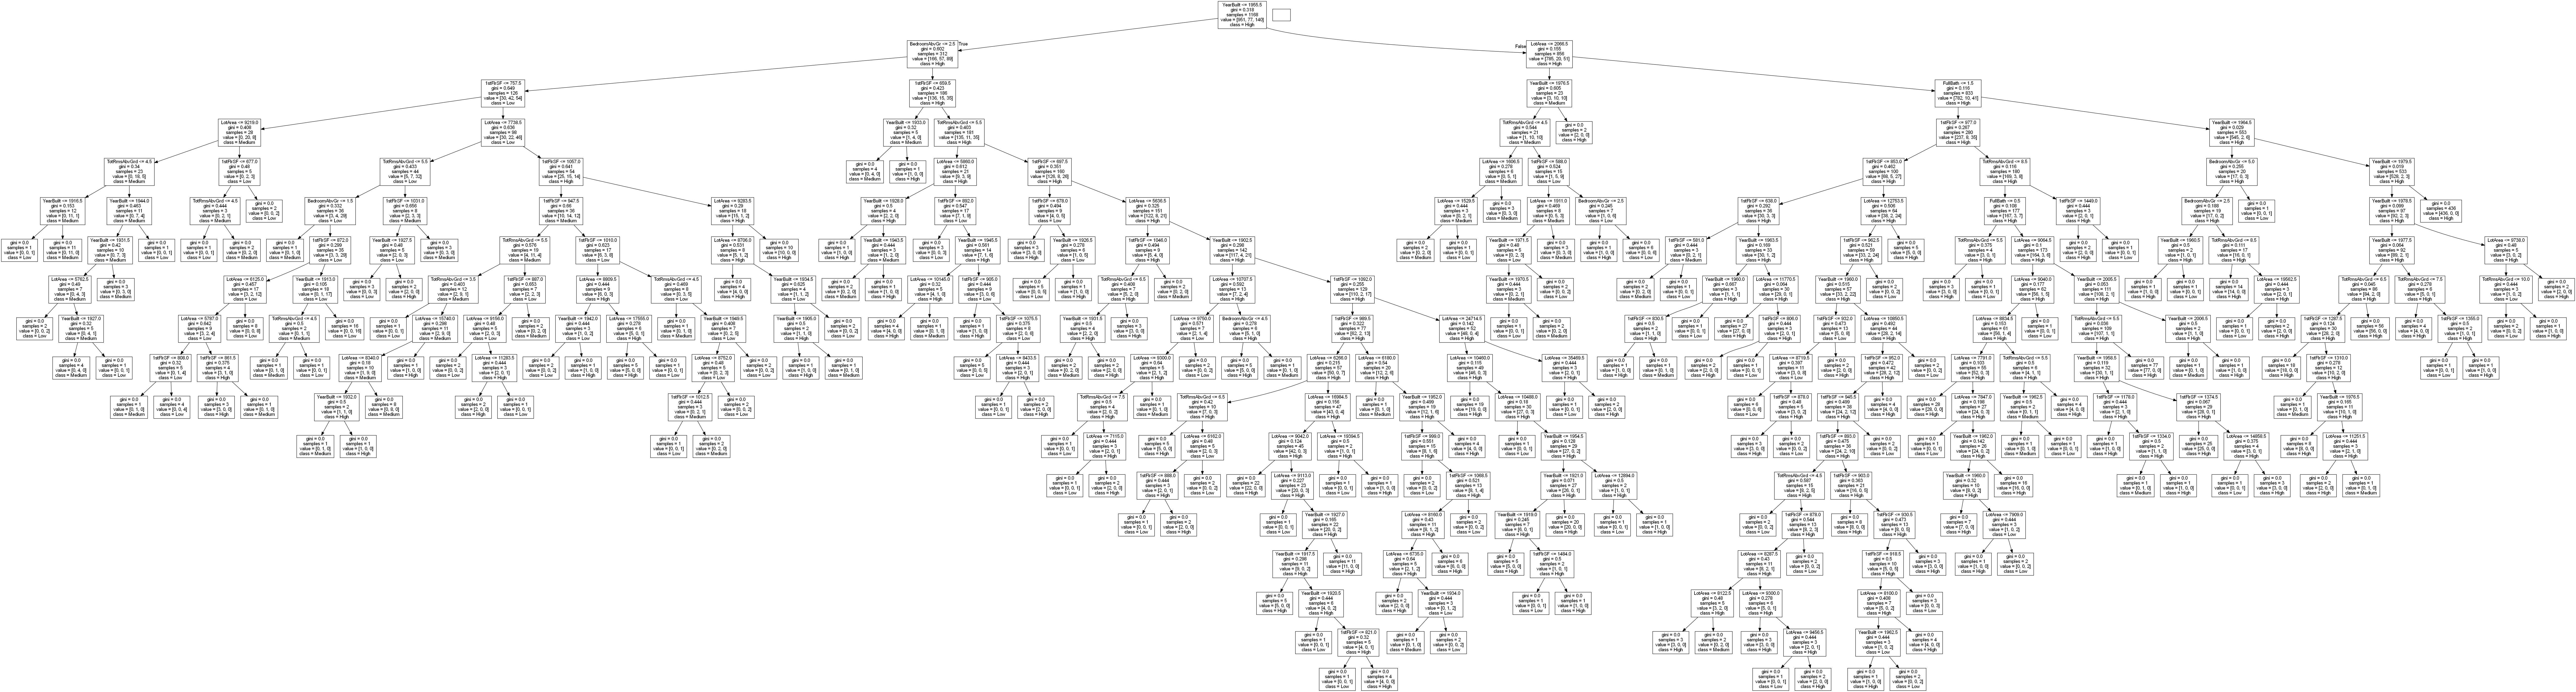

In [10]:
# vẽ ảnh
graph = pydotplus.graph_from_dot_data(dot_data)
# show graph
Image(graph.create_png())

In [11]:
graph.write_pdf("cayqd.pdf")
#create PNG
graph.write_png("anh.png")

True